# PCA & K Means Clustering

## Load libraries and dataset

In [92]:
# Load libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

In [15]:
# Load dataset
df = pd.read_csv(r'Data/als_data.csv')

# View the dataframe
df.head(5)

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,...,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,1,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,...,143.0,0.017422,533,8,7.0,7,0.002646,6.0,6.0,6.0
1,2,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,...,136.0,0.010453,649,8,7.0,5,0.005386,7.0,5.0,5.0
2,3,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,...,140.0,0.008929,1234,5,0.0,0,0.008929,6.0,5.0,5.0
3,4,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,...,138.0,0.012469,2492,5,5.0,3,0.004988,7.0,6.0,5.0
4,5,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,...,138.0,0.008292,2956,6,4.0,1,0.008489,6.0,5.0,5.0


# 1. Remove any data that is not relevant ot the patient's ALS condition.

In [16]:
# Drop the ID & subject id columns
df = df.drop(['ID', 'SubjectID'], axis=1)

# 2. Apply a standard scaler to the data.

In [18]:
# Create standardizer
standardizer = StandardScaler()

In [19]:
# Standardize data
df_s = standardizer.fit_transform(df)

# 3. Create a plot of the cluster silhouette score versus the number of clusters in a K-means cluster.

In [75]:
# Create lists to store clusters
clusters = []
inertia_vals = []

# Create clusters
for k in (2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20):
    model = KMeans(n_clusters=k, random_state=7)
    model.fit(df_s)
    
    # Add model to list
    clusters.append(model)
    inertia_vals.append(model.inertia_)

In [86]:
# Create an empty dataframe for silhouette counts
sil_df = pd.DataFrame(columns=['Clusters', 'Silhouette Score'])

In [88]:
# Append sil_df with silhouette scores
for c in (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18):
    s = silhouette_score(df_s,clusters[c].predict(df_s),metric='euclidean')
    clus = clusters[c].n_clusters
    sil_df = sil_df.append({'Clusters' : clus, 'Silhouette Score' : s}, ignore_index=True)

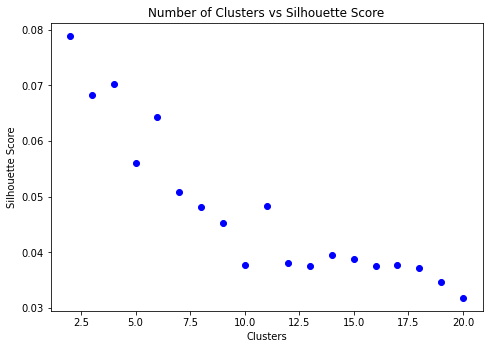

In [89]:
# Create a scatter plot of Clusters vs Silhouette Score
fig=plt.figure()
ax=fig.add_axes([0, 0, 1, 1])
ax.scatter(sil_df['Clusters'], sil_df['Silhouette Score'], color='b')
ax.set_xlabel('Clusters')
ax.set_ylabel('Silhouette Score')
ax.set_title('Number of Clusters vs Silhouette Score')
plt.show()

# 4. Use the plot created in (3) to choose an optimal number of clusters for K-means. Justify your choice.

The optimal number of clusters is 2 as it has the highest silhouette score

# 5. Fit a K-means model to the data with the optimal number of clusters chosen in part (4).

In [90]:
# Fit the model to the data with 2 clusters
k_means_model = KMeans(n_clusters=2, random_state=7)
k_means_model.fit(df_s)

KMeans(n_clusters=2, random_state=7)

In [102]:
# Obtain the cluster labels
label = k_means_model.fit_predict(df_s)

# 6. Fit a PCA transformation with two features to the scaled data.

In [93]:
# Create a pca with 2 components
pca = PCA(n_components=2)

# Fit the PCA
als_pca = pca.fit_transform(df_s)

In [100]:
# Create a dataframe
als_pca_df = pd.DataFrame(data=als_pca, columns = ['PC 1', 'PC 2'])

In [104]:
# Add the cluster label to the dataframe
als_pca_df['Cluster'] = label

In [105]:
# View the dataframe
als_pca_df

,PC 1,PC 2,Cluster
0,-1.426709,-2.320416,0
1,-1.440259,-4.871003,0
2,1.617859,-0.429540,1
3,-1.919943,2.095288,0
4,0.297719,0.167356,1
...,...,...,...
2218,-4.477582,1.199746,0
2219,-0.399048,-1.875772,0
2220,-0.432847,4.245127,0
2221,-0.330734,3.317013,0


# 7. Make a scatterplot the PCA transformed data coloring each point by its cluster value.

In [121]:
# Filter out cluters
als_cluster0 = als_pca_df.loc[als_pca_df['Cluster'] == 0]
als_cluster1 = als_pca_df.loc[als_pca_df['Cluster'] == 1]

In [122]:
als_cluster0

,PC 1,PC 2,Cluster
0,-1.426709,-2.320416,0
1,-1.440259,-4.871003,0
3,-1.919943,2.095288,0
5,-4.528937,-1.298649,0
8,-2.535018,2.299500,0
...,...,...,...
2217,-2.865611,2.047516,0
2218,-4.477582,1.199746,0
2219,-0.399048,-1.875772,0
2220,-0.432847,4.245127,0


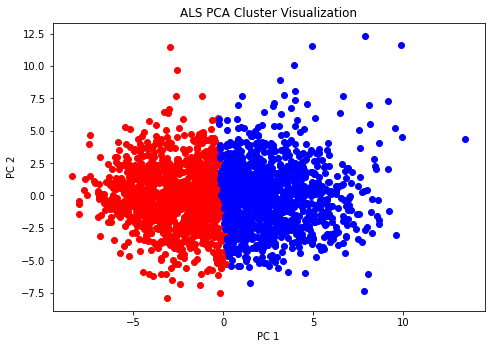

In [128]:
# Create a scatter plot of Clusters vs Silhouette Score
fig=plt.figure()
ax=fig.add_axes([0, 0, 1, 1])
ax.scatter(als_cluster0['PC 1'] , als_cluster0['PC 2'] , color = 'red')
ax.scatter(als_cluster1['PC 1'] , als_cluster1['PC 2'] , color = 'blue')
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_title('ALS PCA Cluster Visualization')
plt.show()

# 8. Summarize your results and make a conclusion.

After applying kmeans clustering and PCA, two distinct groups in the ALS data have been indentified. From the visualization above, no datapoints seem out of place from the groupings. 